In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/boston.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Summary Statistics:
              crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis       

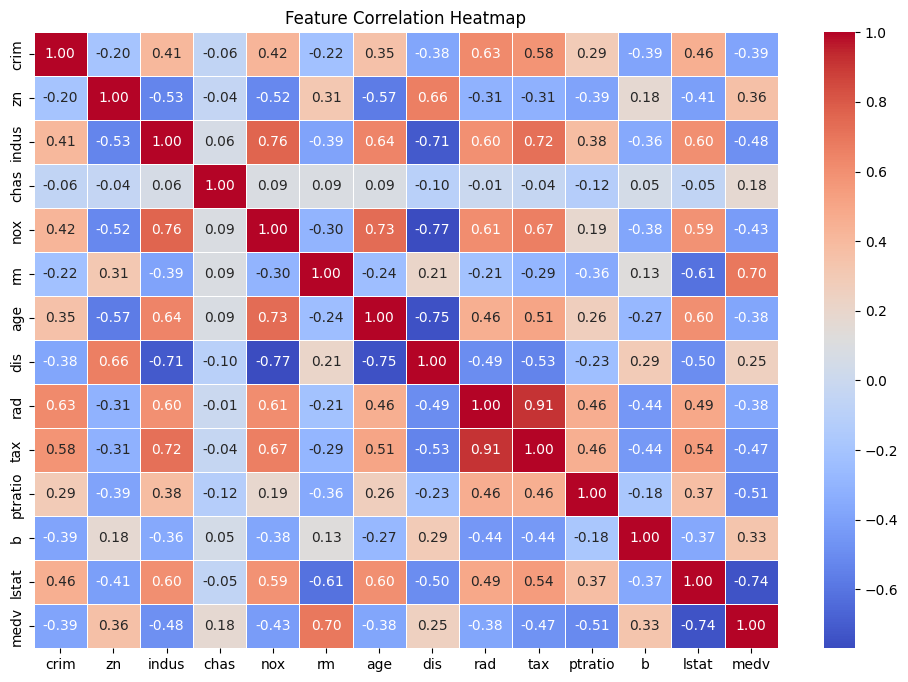

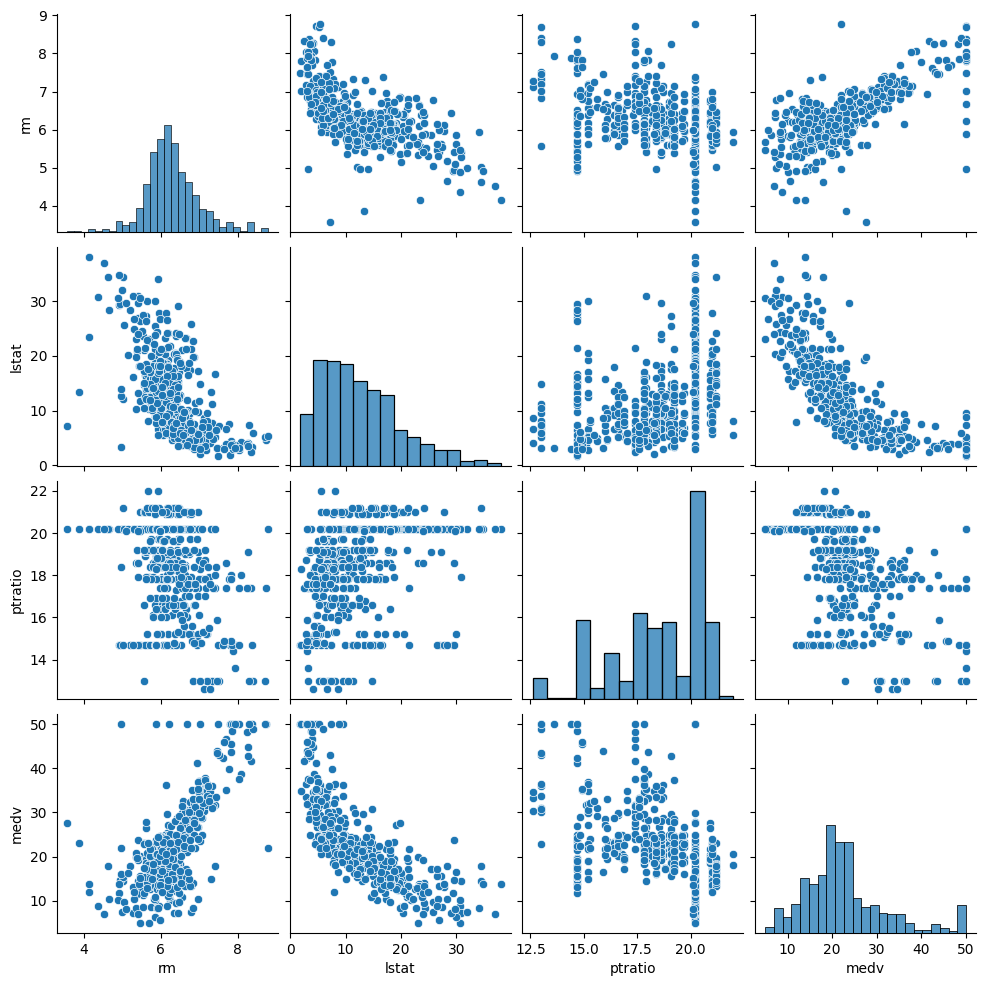

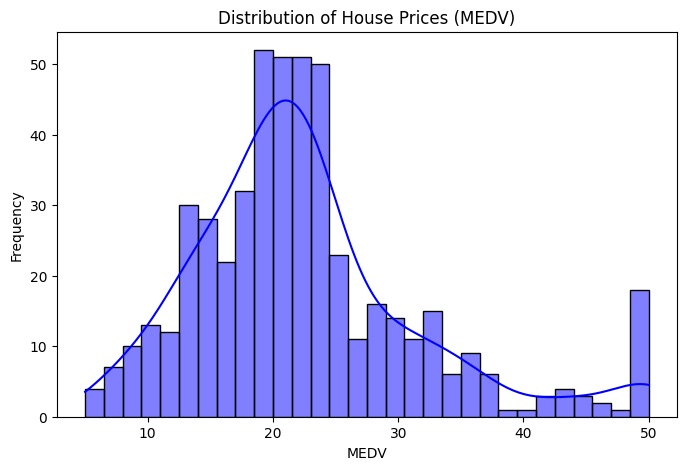

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# the annotation would show the correlation values for each pair of variables in your DataFrame.
#annot=True, you're asking the heatmap to display the actual numeric value inside each colored cell.
plt.title("Feature Correlation Heatmap")

plt.show()

# Pairplot for key variables
sns.pairplot(df[['rm', 'lstat', 'ptratio', 'medv']])
plt.show()

# Distribution of target variable (MEDV)
plt.figure(figsize=(8, 5))
sns.histplot(df['medv'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#define features (x) and target(y)

x = df.drop(columns=['medv'])
y = df["medv"]

#Split the dataset(80% train, 20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2 Score: 0.6688
RMSE: 4.9286


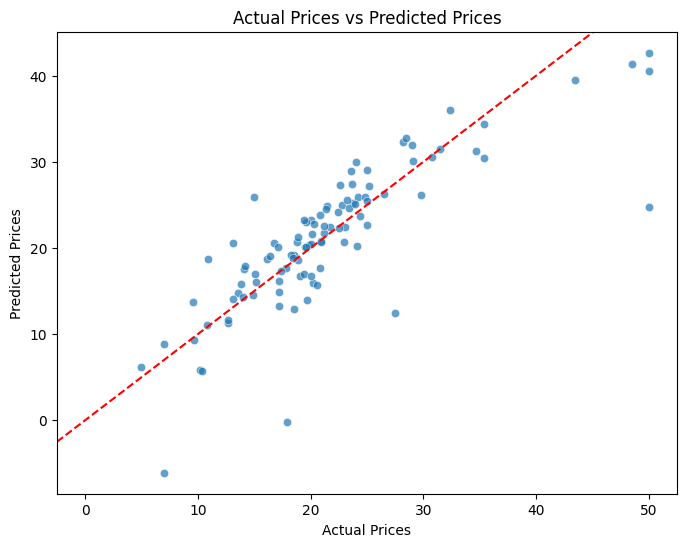

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.axline([0,0],[1,1],color="red", linestyle="--")
plt.show()


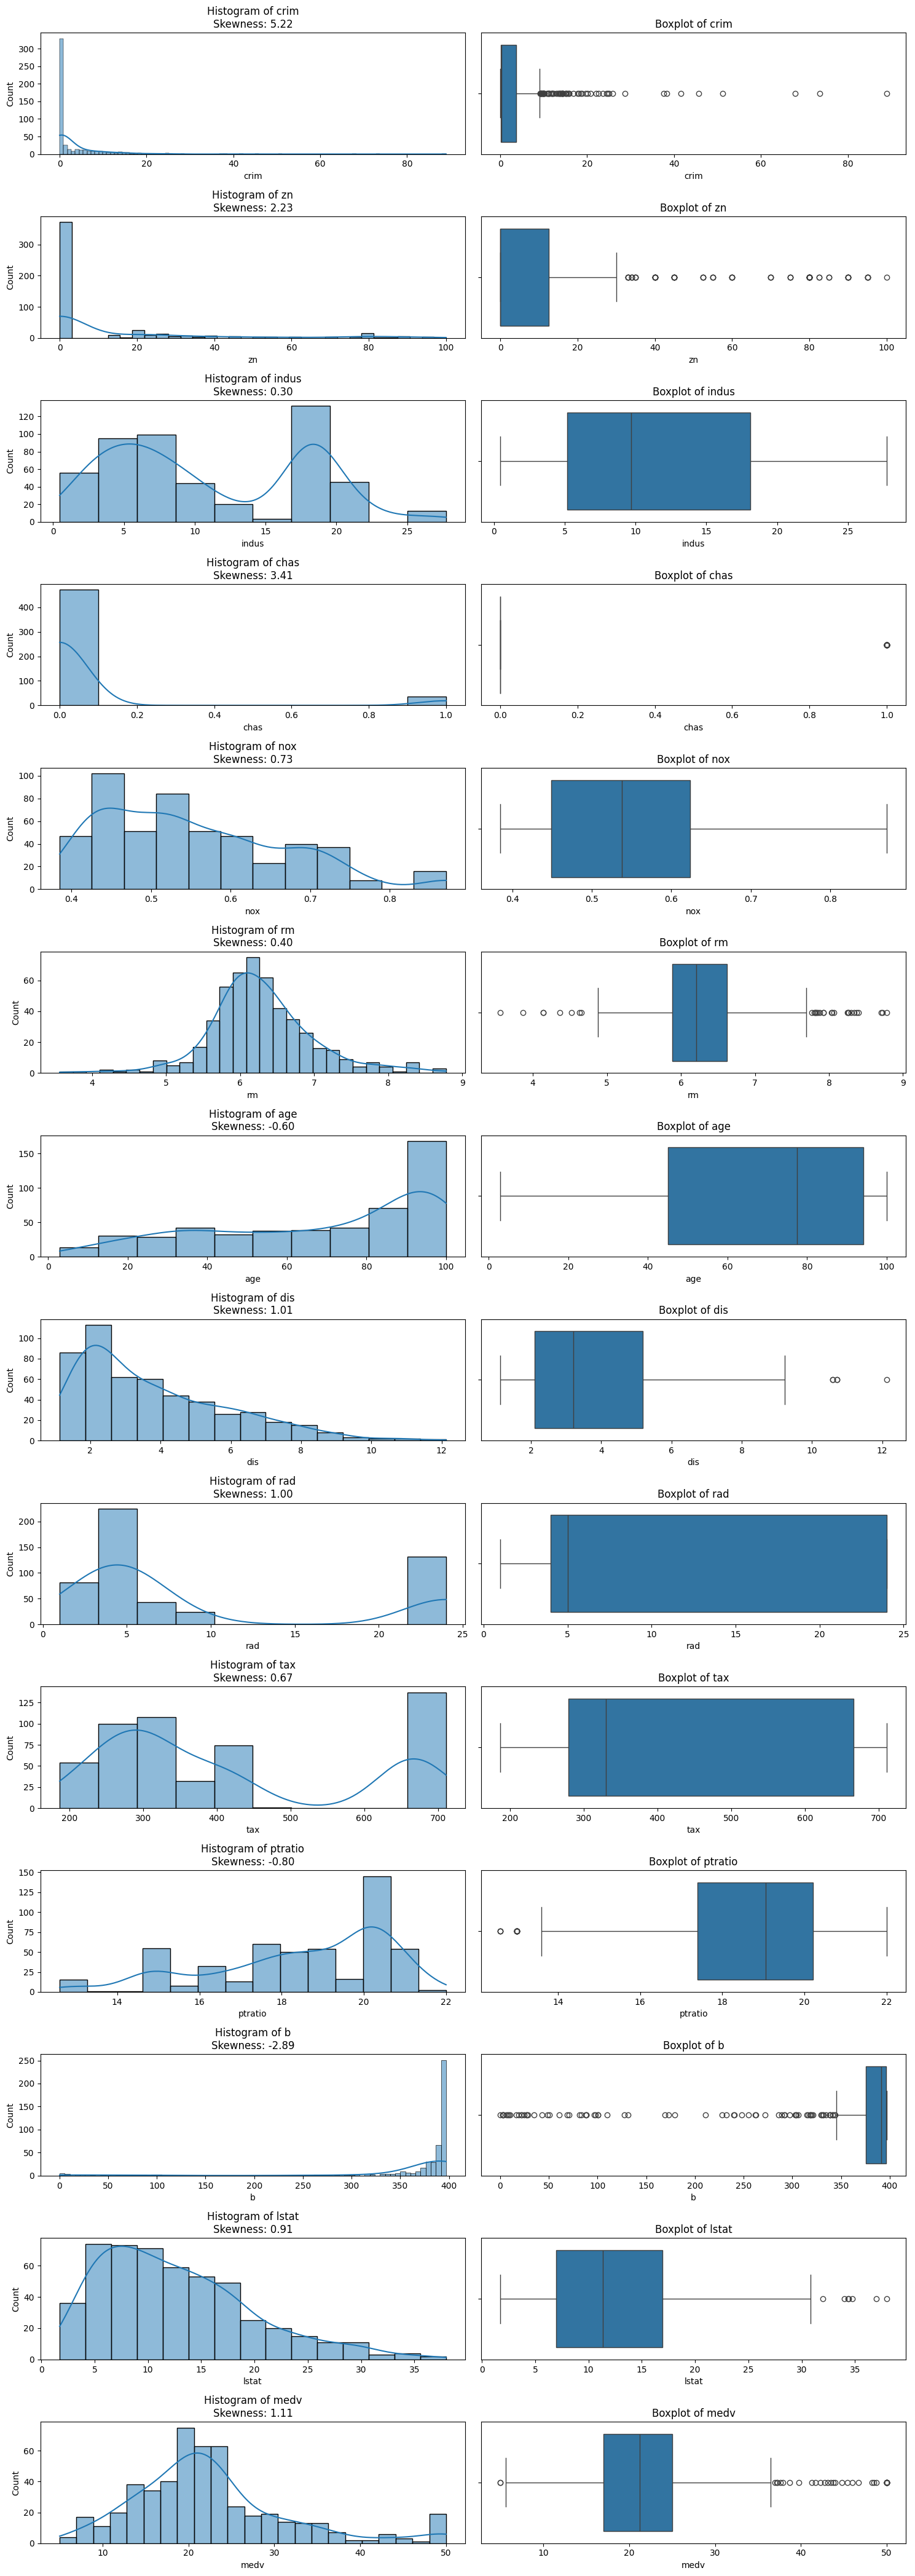

In [ ]:

from scipy.stats import skew

skewness = df.skew()

# Plot histograms and boxplots
num_cols = len(df.columns)
plt.figure(figsize=(15, num_cols * 3))

for i, col in enumerate(df.columns):
    plt.subplot(num_cols, 2, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}\nSkewness: {skewness[col]:.2f}')

    plt.subplot(num_cols, 2, 2 * i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df.skew()

,0
crim,5.223149
zn,2.225666
indus,0.295022
chas,3.405904
nox,0.729308
rm,0.403612
age,-0.598963
dis,1.011781
rad,1.004815
tax,0.669956


In [ ]:
import numpy as np

#find highly skewed columns

skewed_cols = df.skew().abs()
highly_skewed=skewed_cols[skewed_cols>1].index
negatively_skewed=skewed_cols[skewed_cols<1].index
print("highly skewed columns:" , highly_skewed)
print("negatively skewed columns:" ,negatively_skewed)

highly skewed columns: Index(['crim', 'zn', 'chas', 'dis', 'rad', 'b', 'medv'], dtype='object')
negatively skewed columns: Index(['indus', 'nox', 'rm', 'age', 'tax', 'ptratio', 'lstat'], dtype='object')


In [ ]:
df[highly_skewed]=df[highly_skewed].apply(lambda x: np.log1p(x))


In [ ]:
df[highly_skewed]

,crim,zn,chas,dis,rad,b,medv
0,0.006300,2.944439,0.0,1.627278,0.693147,5.986201,3.218876
1,0.026944,0.000000,0.0,1.786261,1.098612,5.986201,3.117950
2,0.026924,0.000000,0.0,1.786261,1.098612,5.975919,3.575151
3,0.031857,0.000000,0.0,1.954757,1.386294,5.980479,3.538057
4,0.066770,0.000000,0.0,1.954757,1.386294,5.986201,3.616309
...,...,...,...,...,...,...,...
501,0.060747,0.000000,0.0,1.246630,0.693147,5.973784,3.152736
502,0.044275,0.000000,0.0,1.190127,0.693147,5.986201,3.072693
503,0.058986,0.000000,0.0,1.152943,0.693147,5.986201,3.214868
504,0.103991,0.000000,0.0,1.220505,0.693147,5.977492,3.135494


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df[negatively_skewed]=pt.fit_transform(df[negatively_skewed])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#define features (x) and target(y)

x = df.drop(columns=['medv'])
y = df["medv"]

#Split the dataset(80% train, 20% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2 Score: 0.7555
RMSE: 0.1842


In [ ]:
input_data = {
    "crim":float(input("Enter crime rate: ")),
    "zn":float(input("Enter proportion of residential land zoned for lots over 25,000 sq.ft: ")),
    "indus":float(input("Enter proportion of non-retail business acres per town: ")),
    "chas":float(input("Enter Charles River dummy variable (= 1 if tract bounds river; 0 otherwise): ")),
    "nox":float(input("Enter nitrogen oxides concentration (parts per 10 million): ")),
    "rm":float(input("Enter average number of rooms per dwelling: ")),
    "age":float(input("Enter proportion of owner-occupied units built prior to 1940: ")),
    "dis":float(input("Enter weighted mean of distances to five Boston employment centres: ")),
    "rad":float(input("Enter index of accessibility to radial highways: ")),
    "tax":float(input("Enter full-value property-tax rate per $10,000: ")),
    "ptratio":float(input("Enter pupil-teacher ratio by town: ")),
    "b":float(input("Enter 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town: ")),
    "lstat":float(input("Enter lower status of the population (percent): "))
}

input_df=pd.DataFrame([input_data])

predicted_price = model.predict(input_df)[0]
print(f"Predicted House Price (MEDV): {predicted_price:.2f}")

Enter crime rate: 0.06
Enter proportion of residential land zoned for lots over 25,000 sq.ft: 5
Enter proportion of non-retail business acres per town: .6
Enter Charles River dummy variable (= 1 if tract bounds river; 0 otherwise): 7
Enter nitrogen oxides concentration (parts per 10 million): 3
Enter average number of rooms per dwelling: 4
Enter proportion of owner-occupied units built prior to 1940: 5
Enter weighted mean of distances to five Boston employment centres: 2
Enter index of accessibility to radial highways: 6
Enter full-value property-tax rate per $10,000: 9
Enter pupil-teacher ratio by town: 4
Enter 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town: 2
Enter lower status of the population (percent): 5


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but LinearRegression is expecting 105 features as input.

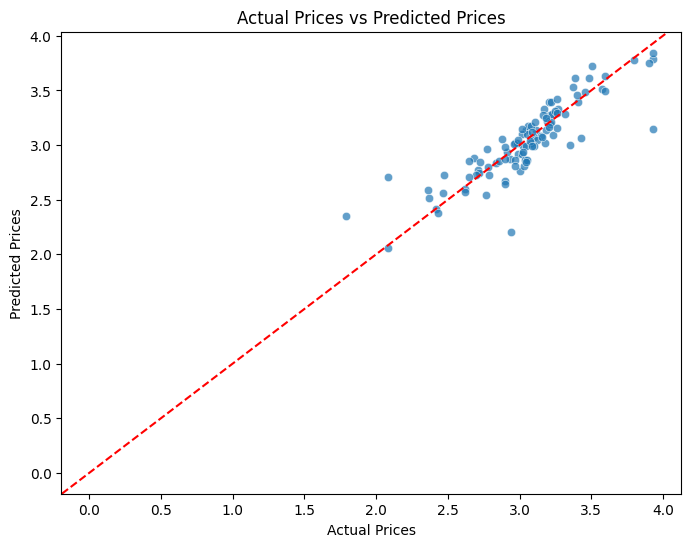

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.axline([0,0],[1,1],color="red", linestyle="--")
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#apply polynomial feature degree(2)
poly =  PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
#split the data set 80 20
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=42)
#train linear rgrs model
model=LinearRegression()
model.fit(x_train,y_train)
#make predictions
y_pred=model.predict(x_test)
#scoere
mse=mean_squared_error(y_test,y_pred) ** 0.5
r2=r2_score(y_test,y_pred)
print("RMean Squared Error:",mse)
print("R-squared:",r2)

RMean Squared Error: 0.1349252156146472
R-squared: 0.8687444958518966


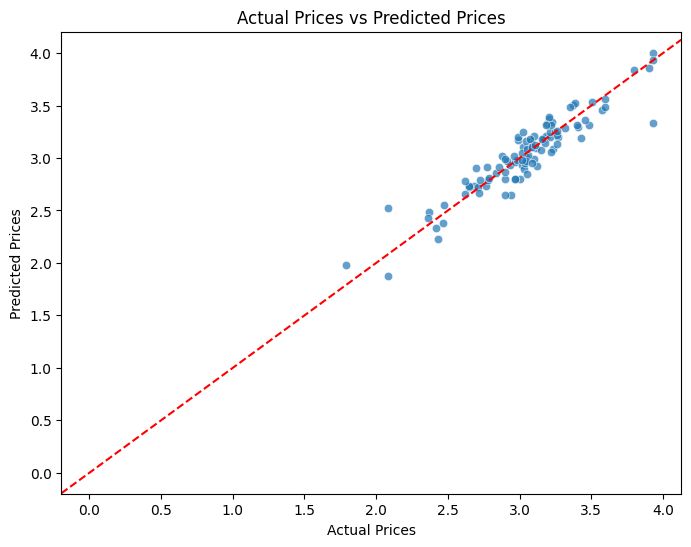

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.axline([0,0],[1,1],color="red", linestyle="--")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f" Random Forest R^2 score: {r2:.4f}")
print(f"Random Forest RMSE: {rmse:.4f}")



 Random Forest R^2 score: 0.8585
Random Forest RMSE: 0.1401


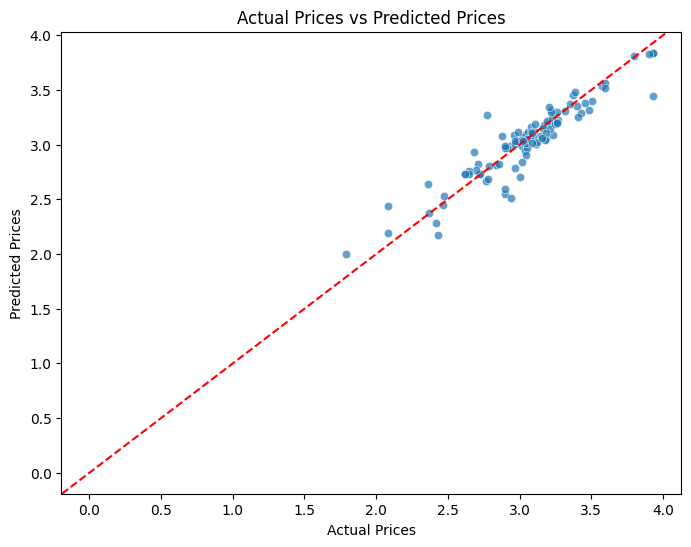

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.axline([0,0],[1,1],color="red", linestyle="--")
plt.show()